In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import xarray as xr

In [2]:
#only modify this part with your own paths------

#define some paths and files---
#general path
homee = "/export/lv4/user/jfajardourbina/"
#path for the files with particles
dir_tracks_sluices=f"{homee}dws_ulf_getm_2D_depth_avg/experiments_post_proc/lagrangian_simulation_36years/exp-deployHighVolume_coords-xcyc_save-fracM2_deploy-everyM2_Tsim-60-91d_particles_around_sluices/post_proc_data/tracks_sluices/"
#path for the bathymetry file
dir_bathy=f"{homee}dws_ulf_getm_2D_depth_avg/experiments_post_proc/analysis_eulerian_data_36years/data_bathy_grid/" 

In [3]:
#bathymetry file---
file_bathy="DWS200m.2012.v03.nc"

#files for particles deployed around both sluices---
file_sluice_den="tracks_DenOever_198001-201510_coords-xcyc_save-fracM2_deploy-everyM2_Tsim-60d.nc"
file_sluice_kor="tracks_Kornwerderzand_198001-201510_coords-xcyc_save-fracM2_deploy-everyM2_Tsim-60d.nc"

In [4]:
#open bathymetry file---
dsba=xr.open_dataset(dir_bathy+file_bathy).load() #bathymetry file
xc=dsba.xc; yc=dsba.yc; #coordinates
h=dsba.bathymetry #bathymetry
mask=h.copy(); mask=xr.where(np.isfinite(mask),1,0) #mask ocean=1, land=0

In [5]:
#open trajectories for Den Oever---
dst_den=xr.open_dataset(dir_tracks_sluices+file_sluice_den)

In [6]:
#open trajectories for Kornwerderzand---
dst_kor=xr.open_dataset(dir_tracks_sluices+file_sluice_kor)

In [7]:
#get information about particles for Den Oever----
#the same values are for Kornwerderzand

#get number of particles per deployment = 17
npa=dst_den.attrs['number_of_particles_per_deployment']
#get number of deployments = 25290
num_deploys=dst_den.attrs['number_of_deployments']
#get number of particle trajectories = 429930
num_trajs=dict(dst_den.dims)['traj'] # = npa*num_deploys
#get number of observations for a particle trajectory = 1741
nt=dict(dst_den.dims)['obs']
#get temporal resolution for a particle trajectory = 2981 (approx 49.7 minutes)
dt=dst_den.attrs['temporal_resolution_particles_in_seconds']
#get maximum duration of the trajectories (approx 60 days)
max_duration=(nt-1)*dt/86400 #days
#
print(f"number of particles per deployment = {npa}")
print(f"number of deployments = {num_deploys}")
print(f"number of particle trajectories = {num_trajs}")
print(f"temporal resolution for a particle trajectory = {dt} s = {dt/60:.2f} min")
print(f"maximum duration of the trajectories = {max_duration:.2f} day")
#
#So: 
#- We have deployed "npa" particles at the same time around a sluice.
#- After 1 tidal cycle we deploy again particles in the same positions.

number of particles per deployment = 17
number of deployments = 25290
number of particle trajectories = 429930
temporal resolution for a particle trajectory = 2981 s = 49.68 min
maximum duration of the trajectories = 60.03 day


### Explore trajectories: 2009-05

<ipython-input-8-e355f38b1ad2>:25: UserWarning: No contour levels were found within the data range.
  ax.contour(xc/1e3,yc/1e3,mask,[1],colors='k',linewidths=1,zorder=3);


Text(0.5, 1.0, 'Den Oever (2009-05-01T01:50:00)')

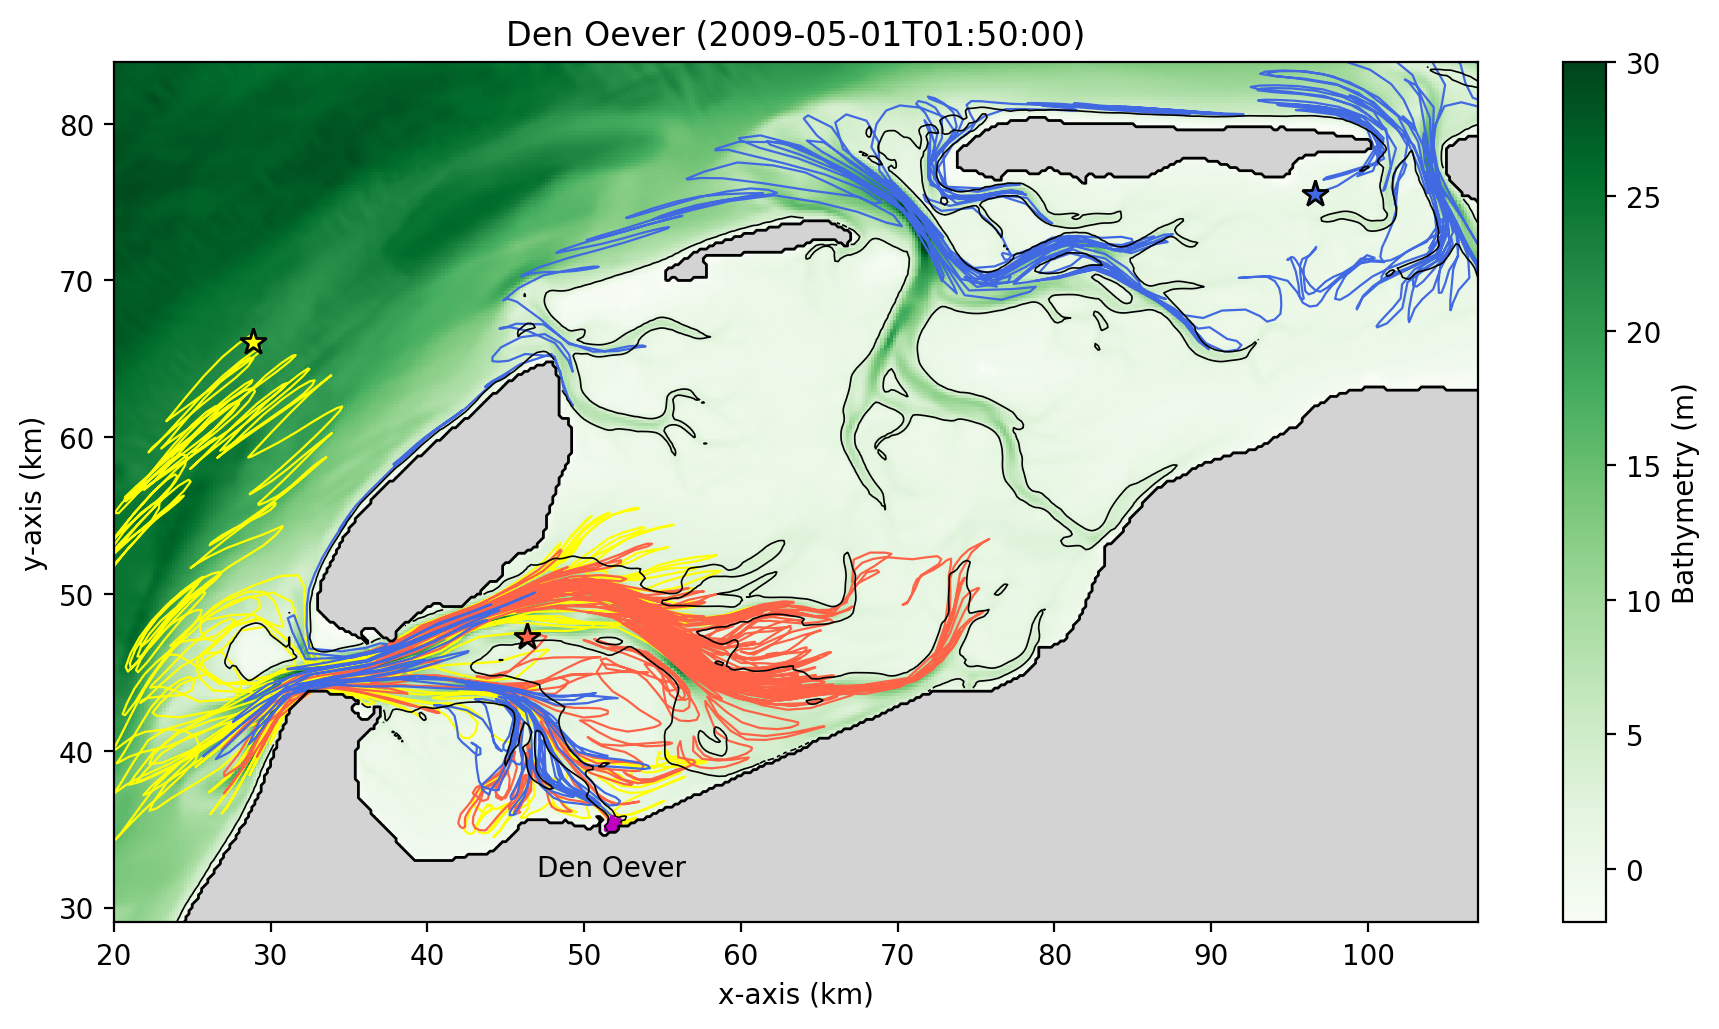

In [8]:
#get trajectories for particles deployed in a specific year-month (Den Oever)---
#select year-month
time='2009-05'
#find index
dst_den_1m=(dst_den.time.isel(obs=0)>np.datetime64(time)) & (dst_den.time.isel(obs=0)<np.datetime64(time)+np.timedelta64(1,'M'))
#get trajectories
dst_den_1m=dst_den.isel(traj=dst_den_1m)
#get number of deployments for this month
num_deploys_1m=int(dict(dst_den_1m.dims)['traj']/npa)


#plot---
fig,ax= plt.subplots(1,1,figsize=(11,5.7), dpi=200)
#
#background map
cmap = mpl.cm.get_cmap("Greens").copy()
cmap.set_bad(color='lightgrey')
aa=ax.pcolormesh(xc/1e3,yc/1e3,h,vmin=-2,vmax=30,shading='auto',cmap=cmap)#wind-energy lon-lat
cbar=plt.colorbar(aa,ax=ax); cbar.ax.set_ylabel('Bathymetry (m)')
ax.set_xlabel('x-axis (km)'); ax.set_ylabel('y-axis (km)')
ax.text(47,32,'Den Oever'); 
#ax.text(73,41,'Kornwerderzand')
ax.axis('equal'); ax.axis([20,107,33,80]);
ax.contour(xc/1e3,yc/1e3,h,[3],colors='k',linewidths=.6,zorder=3) #bathy in lon-lat from topo file 
ax.contour(xc/1e3,yc/1e3,mask,[1],colors='k',linewidths=1,zorder=3);
#
#plot initial positions of particles
ax.plot(dst_den.x.isel(traj=range(npa),obs=0)/1e3,dst_den.y.isel(traj=range(npa),obs=0)/1e3,'om',ms=1,zorder=2)
#ax.plot(dst_kor.x.isel(traj=range(npa),obs=0)/1e3,dst_kor.y.isel(traj=range(npa),obs=0)/1e3,'om',ms=1,zorder=2)
#
dep=0 #first deployment of this month
traj0=[5,12,16]
cols=['yellow','tomato','royalblue']
for i,j in zip(traj0,cols): 
    ax.plot(dst_den_1m.x.isel(traj=i+npa*dep)/1e3,dst_den_1m.y.isel(traj=i+npa*dep)/1e3,'-',color=j,lw=.8,ms=4,zorder=1)
    ax.plot(dst_den_1m.x.isel(traj=i+npa*dep,obs=-1)/1e3,dst_den_1m.y.isel(traj=i+npa*dep,obs=-1)/1e3,'*',color=j,lw=.7,ms=10,markeredgecolor='k',zorder=1)
#
#initial time of the above deployment
time_dep=str(dst_den_1m.time.isel(obs=0,traj=traj0[0]+npa*dep).values)[:-10]
ax.set_title(f'Den Oever ({time_dep})')

<ipython-input-9-cf00006b8007>:25: UserWarning: No contour levels were found within the data range.
  ax.contour(xc/1e3,yc/1e3,mask,[1],colors='k',linewidths=1,zorder=3);


Text(0.5, 1.0, 'Kornwerderzand (2009-05-01T01:50:00)')

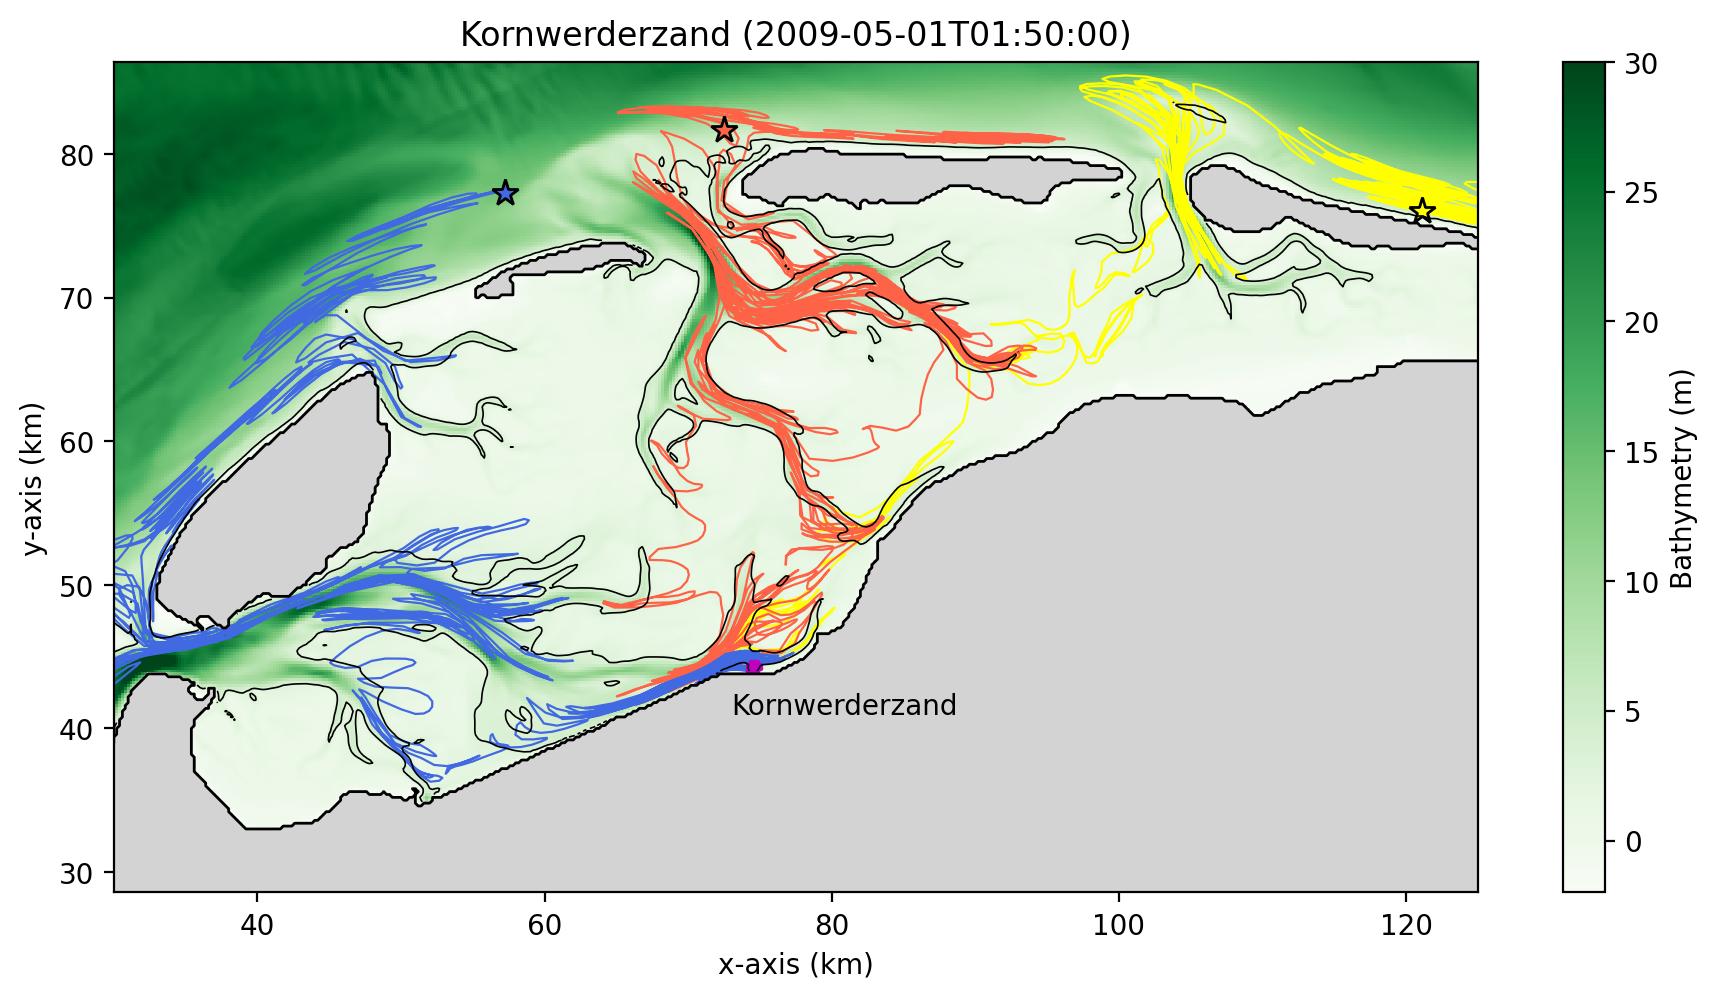

In [9]:
#get trajectories for particles deployed in a specific year-month (Korwerderzand)---
#select year-month
time='2009-05'
#find index
dst_kor_1m=(dst_kor.time.isel(obs=0)>np.datetime64(time)) & (dst_kor.time.isel(obs=0)<np.datetime64(time)+np.timedelta64(1,'M'))
#get trajectories
dst_kor_1m=dst_kor.isel(traj=dst_kor_1m)
#get number of deployments for this month
num_deploys_1m=int(dict(dst_kor_1m.dims)['traj']/npa)


#plot---
fig,ax= plt.subplots(1,1,figsize=(11,5.5), dpi=200)
#
#background map
cmap = mpl.cm.get_cmap("Greens").copy()
cmap.set_bad(color='lightgrey')
aa=ax.pcolormesh(xc/1e3,yc/1e3,h,vmin=-2,vmax=30,shading='auto',cmap=cmap)#wind-energy lon-lat
cbar=plt.colorbar(aa,ax=ax); cbar.ax.set_ylabel('Bathymetry (m)')
ax.set_xlabel('x-axis (km)'); ax.set_ylabel('y-axis (km)')
#ax.text(47,32,'Den Oever'); 
ax.text(73,41,'Kornwerderzand')
ax.axis('equal'); ax.axis([30,125,35,80]);
ax.contour(xc/1e3,yc/1e3,h,[3],colors='k',linewidths=.6,zorder=3) #bathy in lon-lat from topo file 
ax.contour(xc/1e3,yc/1e3,mask,[1],colors='k',linewidths=1,zorder=3);
#
#plot initial positions of particles
#ax.plot(dst_den.x.isel(traj=range(npa),obs=0)/1e3,dst_den.y.isel(traj=range(npa),obs=0)/1e3,'om',ms=1,zorder=2)
ax.plot(dst_kor.x.isel(traj=range(npa),obs=0)/1e3,dst_kor.y.isel(traj=range(npa),obs=0)/1e3,'om',ms=1,zorder=2)
#
dep=0 #1st deployment of this month
traj0=[3,4,7]
cols=['yellow','tomato','royalblue']
for i,j in zip(traj0,cols):
    ax.plot(dst_kor_1m.x.isel(traj=i+npa*dep)/1e3,dst_kor_1m.y.isel(traj=i+npa*dep)/1e3,'-',color=j,lw=.8,ms=4,zorder=1)
    ax.plot(dst_kor_1m.x.isel(traj=i+npa*dep,obs=-1)/1e3,dst_kor_1m.y.isel(traj=i+npa*dep,obs=-1)/1e3,'*',color=j,lw=.7,ms=10,markeredgecolor='k',zorder=1)
#
#initial time of the above deployment
time_dep=str(dst_kor_1m.time.isel(obs=0,traj=traj0[0]+npa*dep).values)[:-10]
ax.set_title(f'Kornwerderzand ({time_dep})')

### Explore trajectories: 2009-11

<ipython-input-10-750081703197>:25: UserWarning: No contour levels were found within the data range.
  ax.contour(xc/1e3,yc/1e3,mask,[1],colors='k',linewidths=1,zorder=3);


Text(0.5, 1.0, 'Den Oever (2009-11-15T06:54:49)')

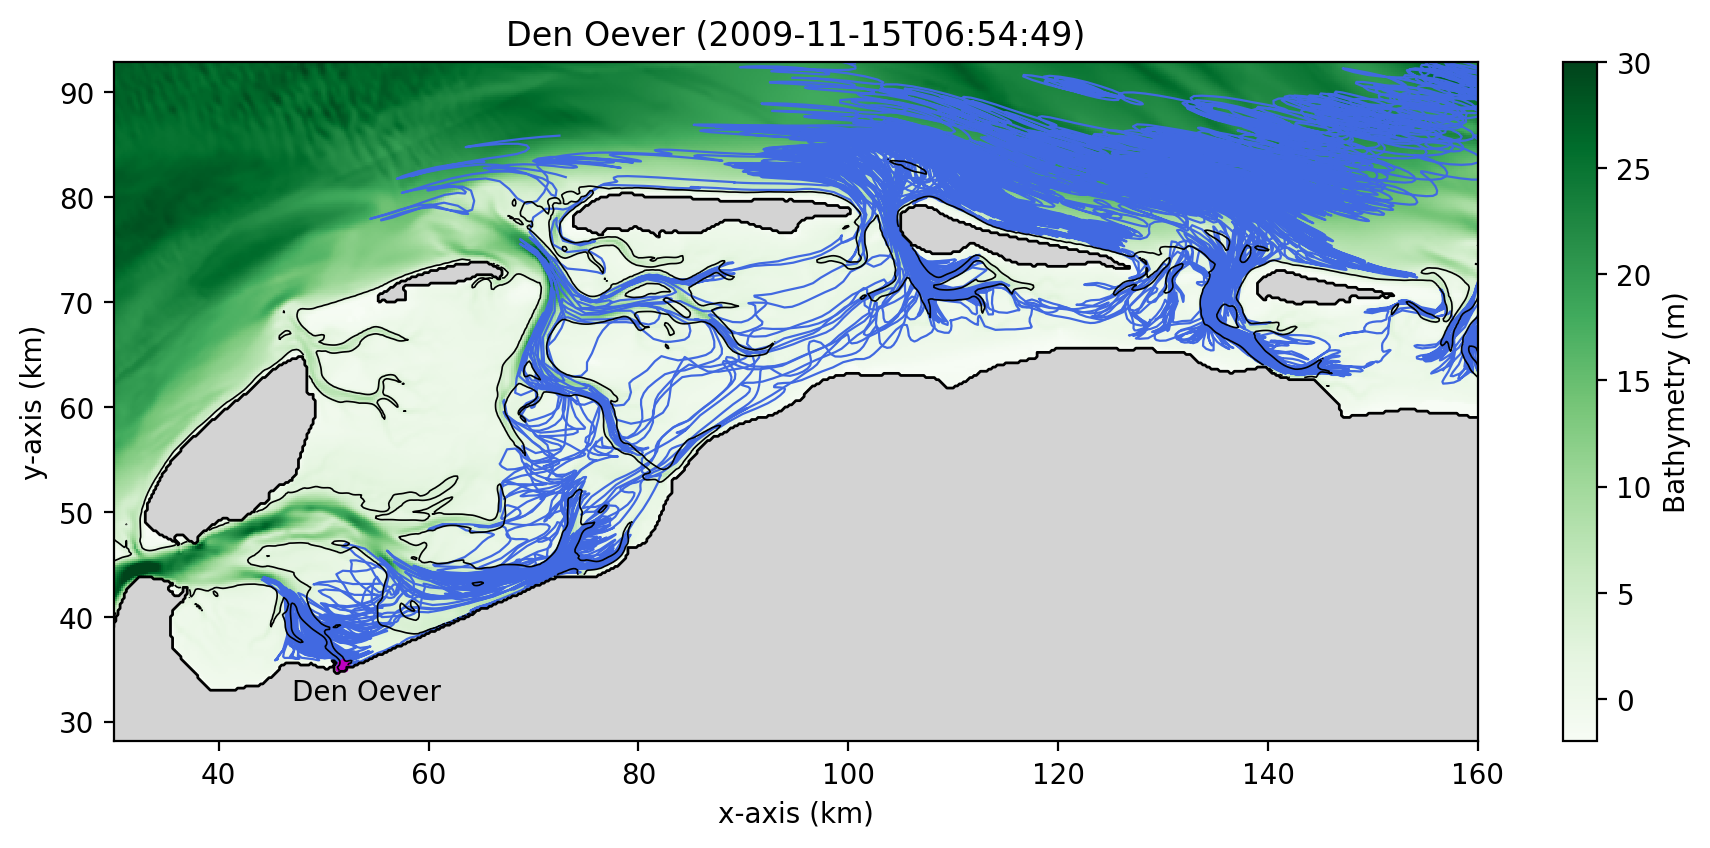

In [10]:
#get trajectories for particles deployed in a specific year-month (Den Oever)---
#select year-month
time='2009-11'
#find index
dst_den_1m=(dst_den.time.isel(obs=0)>np.datetime64(time)) & (dst_den.time.isel(obs=0)<np.datetime64(time)+np.timedelta64(1,'M'))
#get trajectories
dst_den_1m=dst_den.isel(traj=dst_den_1m)
#get number of deployments for this month
num_deploys_1m=int(dict(dst_den_1m.dims)['traj']/npa)


#plot---
fig,ax= plt.subplots(1,1,figsize=(11,4.5), dpi=200)
#
#background map
cmap = mpl.cm.get_cmap("Greens").copy()
cmap.set_bad(color='lightgrey')
aa=ax.pcolormesh(xc/1e3,yc/1e3,h,vmin=-2,vmax=30,shading='auto',cmap=cmap)#wind-energy lon-lat
cbar=plt.colorbar(aa,ax=ax); cbar.ax.set_ylabel('Bathymetry (m)')
ax.set_xlabel('x-axis (km)'); ax.set_ylabel('y-axis (km)')
ax.text(47,32,'Den Oever'); 
#ax.text(73,41,'Kornwerderzand')
ax.axis('equal'); ax.axis([30,160,33,88]);
ax.contour(xc/1e3,yc/1e3,h,[3],colors='k',linewidths=.6,zorder=3) #bathy in lon-lat from topo file 
ax.contour(xc/1e3,yc/1e3,mask,[1],colors='k',linewidths=1,zorder=3);
#
#plot initial positions of particles
ax.plot(dst_den.x.isel(traj=range(npa),obs=0)/1e3,dst_den.y.isel(traj=range(npa),obs=0)/1e3,'om',ms=1,zorder=2)
#ax.plot(dst_kor.x.isel(traj=range(npa),obs=0)/1e3,dst_kor.y.isel(traj=range(npa),obs=0)/1e3,'om',ms=1.5,zorder=2)
#
dep=27 #first deployment of this month
traj0=range(npa)
for i in traj0: 
    ax.plot(dst_den_1m.x.isel(traj=i+npa*dep)/1e3,dst_den_1m.y.isel(traj=i+npa*dep)/1e3,'-',color='royalblue',lw=.8,ms=4,zorder=1)
ax.plot(dst_den_1m.x.isel(traj=i+npa*dep,obs=-1)/1e3,dst_den_1m.y.isel(traj=i+npa*dep,obs=-1)/1e3,'*',color='royalblue',lw=.7,ms=10,markeredgecolor='k',zorder=1)
#
#initial time of the above deployment
time_dep=str(dst_den_1m.time.isel(obs=0,traj=traj0[0]+npa*dep).values)[:-10]
ax.set_title(f'Den Oever ({time_dep})')

<ipython-input-11-9ba6c9b48b63>:24: UserWarning: No contour levels were found within the data range.
  ax.contour(xc/1e3,yc/1e3,mask,[1],colors='k',linewidths=1,zorder=3);


Text(0.5, 1.0, 'kornwerderzand (2009-11-15T06:54:49)')

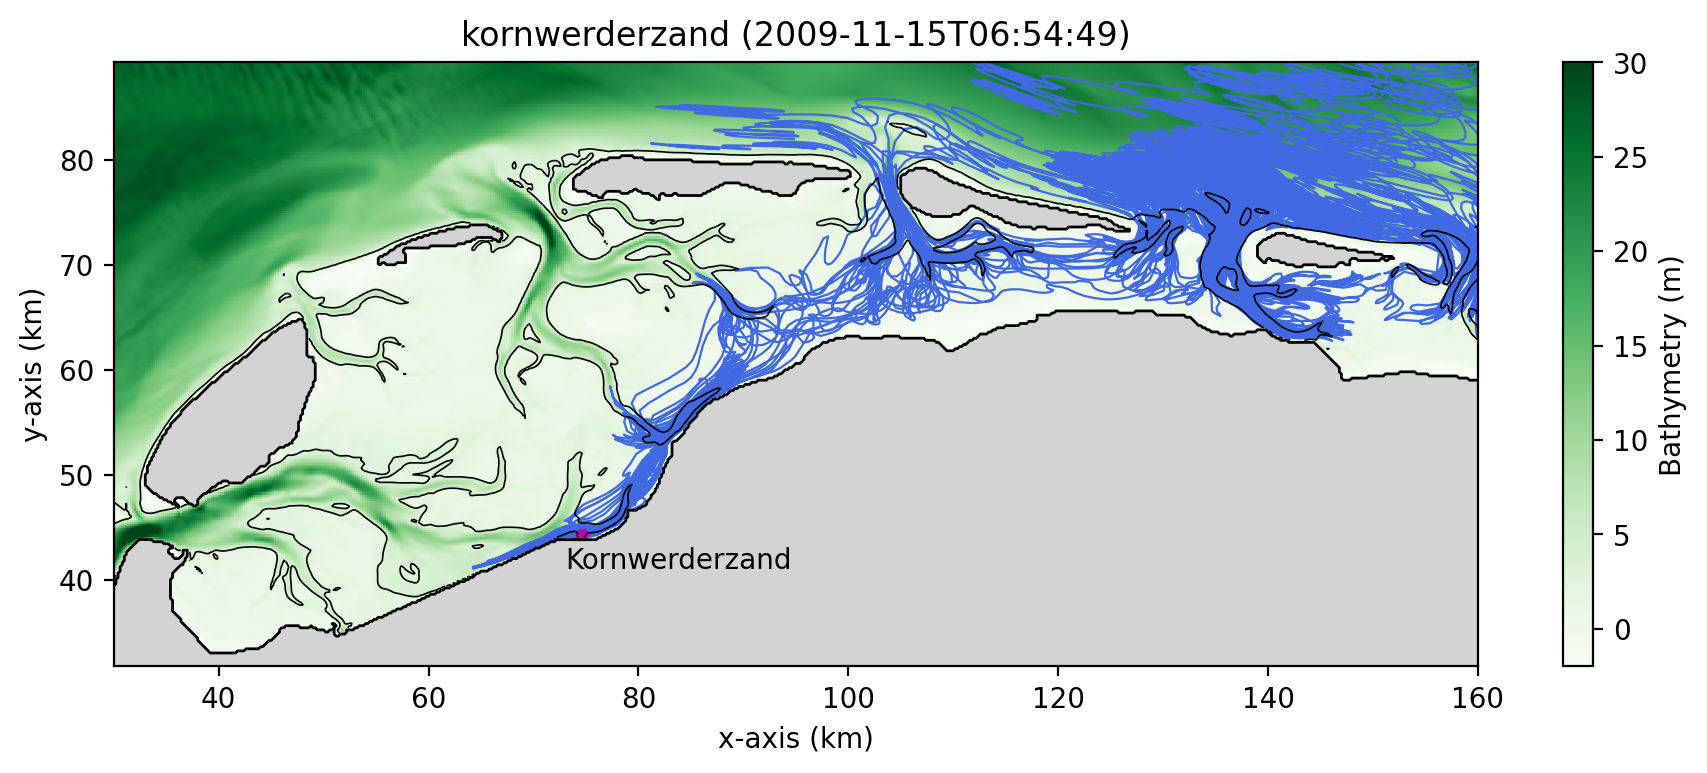

In [11]:
#get trajectories for particles deployed in a specific year-month (korwerderzand)---
#select year-month
time='2009-11'
#find index
dst_kor_1m=(dst_kor.time.isel(obs=0)>np.datetime64(time)) & (dst_kor.time.isel(obs=0)<np.datetime64(time)+np.timedelta64(1,'M'))
#get trajectories
dst_kor_1m=dst_kor.isel(traj=dst_kor_1m)
#get number of deployments for this month
num_deploys_1m=int(dict(dst_kor_1m.dims)['traj']/npa)


#plot---
fig,ax= plt.subplots(1,1,figsize=(11,4), dpi=200)
#
#background map
cmap = mpl.cm.get_cmap("Greens").copy()
cmap.set_bad(color='lightgrey')
aa=ax.pcolormesh(xc/1e3,yc/1e3,h,vmin=-2,vmax=30,shading='auto',cmap=cmap)#wind-energy lon-lat
cbar=plt.colorbar(aa,ax=ax); cbar.ax.set_ylabel('Bathymetry (m)')
ax.set_xlabel('x-axis (km)'); ax.set_ylabel('y-axis (km)')
ax.text(73,41,'Kornwerderzand')
ax.axis('equal'); ax.axis([30,160,33,88]);
ax.contour(xc/1e3,yc/1e3,h,[3],colors='k',linewidths=.6,zorder=3) #bathy in lon-lat from topo file 
ax.contour(xc/1e3,yc/1e3,mask,[1],colors='k',linewidths=1,zorder=3);
#
#plot initial positions of particles
ax.plot(dst_kor.x.isel(traj=range(npa),obs=0)/1e3,dst_kor.y.isel(traj=range(npa),obs=0)/1e3,'om',ms=1,zorder=2)
#
dep=27 #first deployment of this month
traj0=range(npa)
for i in traj0: 
    ax.plot(dst_kor_1m.x.isel(traj=i+npa*dep)/1e3,dst_kor_1m.y.isel(traj=i+npa*dep)/1e3,'-',color='royalblue',lw=.8,ms=4,zorder=1)
ax.plot(dst_kor_1m.x.isel(traj=i+npa*dep,obs=-1)/1e3,dst_kor_1m.y.isel(traj=i+npa*dep,obs=-1)/1e3,'*',color='royalblue',lw=.7,ms=10,markeredgecolor='k',zorder=1)
#
#initial time of the above deployment
time_dep=str(dst_kor_1m.time.isel(obs=0,traj=traj0[0]+npa*dep).values)[:-10]
ax.set_title(f'kornwerderzand ({time_dep})')